# Matplotlib Tutorial Part 11 - Candlestick OHLC Graph

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np

## Getting and Cleaning Data

In [2]:
stock = "EBAY"

# Not needed in Python2.7
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

# Yahoo Finance API
stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' +stock+ '/chartdata;type=quote;range=2m/csv'

# Getting Data from Yahoo Finance API
source_code = urllib.request.urlopen(stock_price_url).read().decode()

# Cleaning Data
stock_data = []  
split_source = source_code.split('\n')

for line in split_source:
    split_line = line.split(',')
    if len(split_line) == 6:
        if 'values' not in line and 'labels' not in line:
            stock_data.append(line)

# Unpacking Data
date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                      delimiter=',',
                                                      unpack=True,
                                                      converters={0: bytespdate2num('%Y%m%d')})

## Candle Stick OHLC Graph

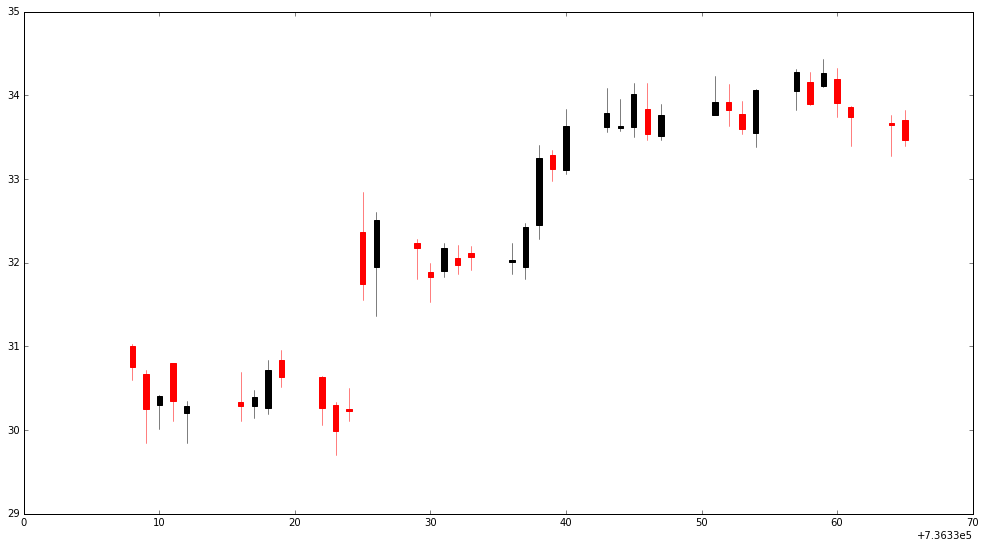

In [3]:
fig = plt.figure(figsize=(17,9))

ax1 = plt.subplot2grid((1,1),(0,0))

ohlc = zip(date, openp, highp, lowp, closep, volume)

candlestick_ohlc(ax1, ohlc,width=.4)

plt.show()

## Candle Stick OHLC Graph Customized

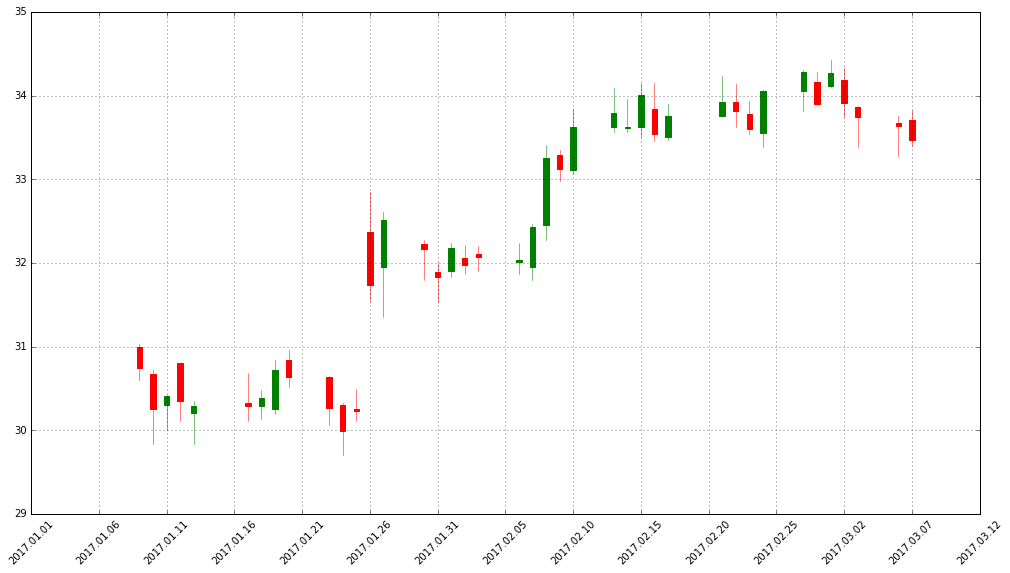

In [4]:
fig = plt.figure(figsize=(17,9))

ax1 = plt.subplot2grid((1,1),(0,0))

ohlc = zip(date, openp, highp, lowp, closep, volume)

#Set Colours for up and dows
candlestick_ohlc(ax1, ohlc,width=.4,colorup='g',colordown='r')

# Rotate Labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

# Set Date Format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# Set amount of dates
ax1.xaxis.set_major_locator(mticker.MaxNLocator(15))

# Plotting
plt.grid(True)
plt.show()

### Previous Part: [Handling Unix Time](Matplotlib Tutorial Part 10 - Handling Unix Time.ipynb)

### Next Part: [Styles](Matplotlib Tutorial Part 12 - Styles.ipynb)

### [Table of Contents](Table of Contents.ipynb) 